In [ ]:
!pip install wordcloud
!pip install psaw
!pip install praw
!pip install playsound

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import praw
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [3]:
# Nananana Botman
reddit = praw.Reddit(client_id ='uG8ftAJoXRMhcw',
                     client_secret ='UV9TeqF36XzlJnmJq0WA4s0dUHs',
                     user_agent='Rollypollyolly by /u/scraper_bot420',
                     username ='scraper_bot420',
                     password ='samk1500')

In [ ]:
subreddit = reddit.subreddit("the_donald")
print(subreddit.title)

In [127]:
from playsound import playsound
playsound("scum_cut.mp3")

Since its creation in late 2015, The_Donald has been a hub of very LOUD toxicity. While there have existed plenty of other notoriously toxic subreddits, The_Donald was unique for how loud they were screaming, you could feel their presence on the site everyday just browsing r/All during the Primary and General election cycles. Unlike other toxic subreddits like r/incels, the goal of the The_Donald's moderators and its fanatical base was to gain notoriety. So to get in the face of the 'cucked libs' who browsed r/All, The_Donald moderators began "playing" the algorithm that determined likelihood of submissions being put onto the front page by putting out tons of "sticky" threads instead of normal submissions. 

Reddit was forced to change its algorithm in July 2016 to combat the non stop wave of meme sticky threads that dominated the front page from The_Donald. The battle continued with Reddit again taking steps in November by preventing all sticky posts from the_donald reach r/all through a unabashed ban. Now, the_Donald has finally been quarantined on June 26th. 

This project consists of multiple data scrapers and visualizations that try to examine this subreddits popularity and the users therein, with a specific focus on the insularity of the community.

In [38]:
# Scraping Stats from top 1000 submissions of all time from The_Donald and appending to lists
score = []
for submission in subreddit.top(limit=1000):
     score.append(submission.score)

unix_time = []
for submission in subreddit.top(limit=1000):
    unix_time.append(submission.created_utc)

comment_count = []
for submission in subreddit.top(limit=1000):
    comment_count.append(submission.num_comments)

upvote_ratio = []
for submission in subreddit.top(limit=1000):
    upvote_ratio.append(submission.upvote_ratio)


sub_id = []
for submission in subreddit.top(limit=1000):
    sub_id.append(submission.id)

# Unix to Datetime Converter 
# unix_time = pd.to_datetime(unix_time, unit="s")


In [39]:
# Create dataframe from scraped lists
top_sub_comments = pd.DataFrame()
top_sub_comments["Total Upvotes"] = score
top_sub_comments["Time Stamp"] = unix_time
top_sub_comments["Total Comments"] = comment_count
top_sub_comments["Upvote Ratio"] = upvote_ratio
top_sub_comments["Submission #ID"] = sub_id

top_sub_comments.head()



,Total Upvotes,Time Stamp,Total Comments,Upvote Ratio,Submission #ID
0,66715,1.478677e+09,11972,0.77,5bzjv5
1,42118,1.469659e+09,20614,0.73,4uxdbn
2,40974,1.481063e+09,826,0.65,5gvy1j
3,37277,1.482443e+09,722,0.64,5jt9xs
4,36619,1.478673e+09,1678,0.68,5bz5ds


In [ ]:
# Sorts by TimeStamp and then Saves Dataframe to CSV file 
top_export = top_sub_comments.sort_values(by=["Time Stamp"])
top_export.to_csv(r"top_sub_comment_data_unix_sorted.csv")

In [ ]:
# Scrape all comments from top 100 submissions of all time on The_Donald
master_comment_list = []
for submission in subreddit.top(limit=100):
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        master_comment_list.append(comment.body)

# Saves all comments to txt
MyFile=open('master_comments_top(100).txt', 'w', encoding="utf-8")
for element in master_comment_list:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()

Scatterplot Time!

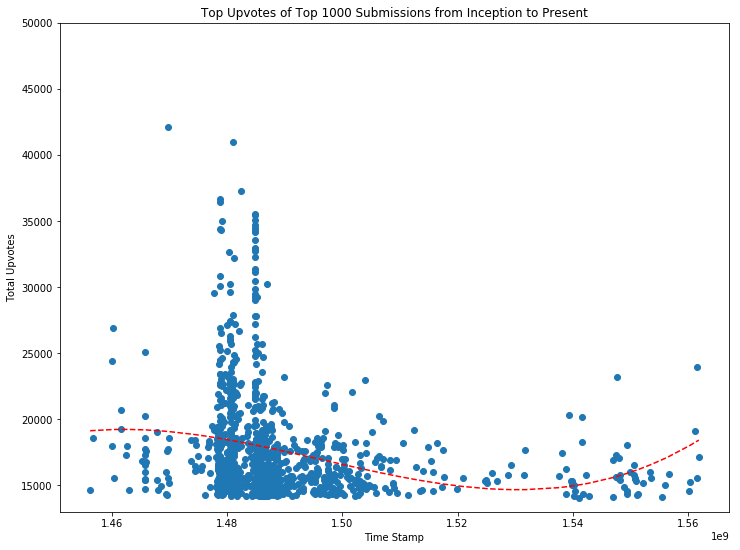

In [91]:
# Opening Data
data3 = pd.read_csv("top_sub_comment_data_unix_sorted.csv")

# Scatter Plot
plt.figure(figsize=(12,9))
plt.scatter(data3['Time Stamp'], data3['Total Upvotes'])
plt.title("Top Upvotes of Top 1000 Submissions from Inception to Present")
plt.ylabel("Total Upvotes")
plt.xlabel("Time Stamp")
plt.ylim(13000, 50000)
x = data3["Time Stamp"]
y = data3["Total Upvotes"]

# Regression Line
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# Pretty Output
plt.show()

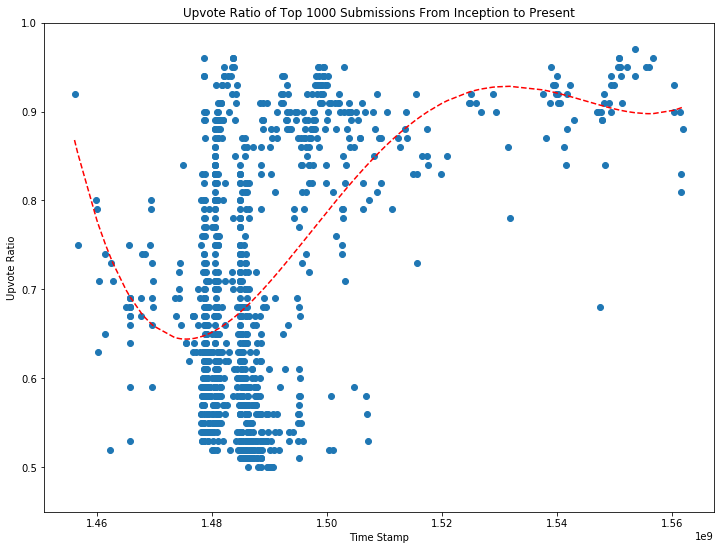

In [89]:
# Opening Data
data2 = pd.read_csv("top_sub_comment_data_unix_sorted.csv")

# Scatter Plot
plt.figure(figsize=(12,9))
plt.scatter(data2['Time Stamp'], data2['Upvote Ratio'])
plt.title("Upvote Ratio of Top 1000 Submissions From Inception to Present")
plt.ylabel("Upvote Ratio")
plt.xlabel("Time Stamp")
plt.ylim(.45, 1)
x = data2["Time Stamp"]
y = data2["Upvote Ratio"]

# Regression Line
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# Pretty Output
plt.show()

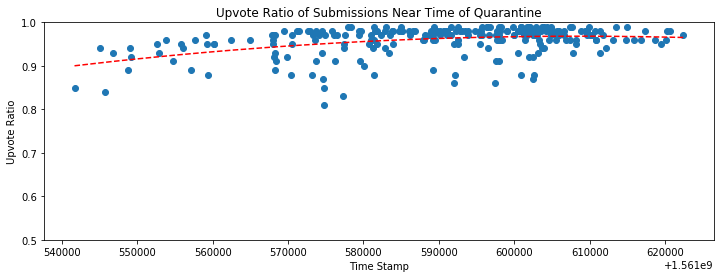

In [87]:
# Opening File
data = pd.read_csv("quarantine_submission_data_real_unix_sort.csv")

# Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(data['Time Stamp'], data['Upvote Ratio'])
plt.title("Upvote Ratio of Submissions Near Time of Quarantine")
plt.ylabel("Upvote Ratio")
plt.xlabel("Time Stamp")
plt.ylim(.5, 1)
x = data["Time Stamp"]
y = data["Upvote Ratio"]

# Regression Line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# Pretty output
plt.show()

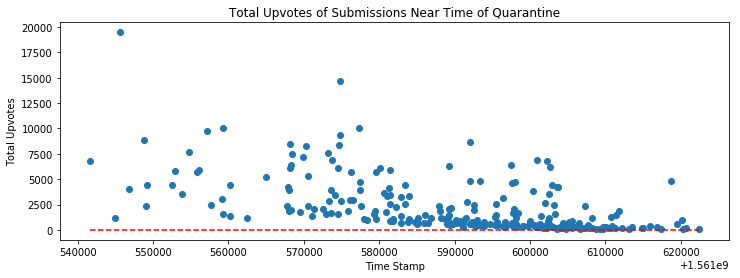

In [90]:
# Opening File
data4 = pd.read_csv("quarantine_submission_data_real_unix_sort.csv")

# Scatter Plot
plt.figure(figsize=(12,4))
plt.scatter(data4['Time Stamp'], data4['Total Upvotes'])
plt.title("Total Upvotes of Submissions Near Time of Quarantine")
plt.ylabel("Total Upvotes")
plt.xlabel("Time Stamp")
x = data4["Time Stamp"]
y = data4["Upvote Ratio"]

# Regression Line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# Pretty Output
plt.show()

Not a very interesting graph, but leads to further questions. It would be interesting to look at a total aggregate of all threads' total upvotes within +/- 1 week of submission to see any changes. Maybe popularity tracking? Which might also be biased depending on the algorithm due to the odd demographics of The_Donald which were only exacerbated by the quarantine (is it total upvotes+total downvotes+total visits+total submissions+total comments or what combination thereof? lots of confounding variables)

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samkn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samkn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
all_text = open("master_comments_top(100).txt", encoding="ANSI").read()

In [21]:
# Punctuation Removal & Casefolding
for char in punctuation:
    all_text = all_text.replace(char, "")
all_text = all_text.casefold()

In [22]:
# Tokenization & Stopwords
tokens2 = word_tokenize(all_text)
stop = stopwords.words("english")
all_text_no_stops = [word for word in tokens2 if word not in stopwords.words('english')]

In [28]:
# Cleaning Up img URL from future wordcloud
for element in all_text_no_stops:
    all_text_no_stops.remove("httpimgurcom0cf3yty")

ValueError: list.remove(x): x not in list

In [29]:
# Saving no stops, no punctuation, tokenized list to a txt file
MyFile2=open('all_text_no_stops.txt', 'w', encoding="utf-8")

for element in all_text_no_stops:
     MyFile2.write(element)
     MyFile2.write('\n')
MyFile2.close()

In [30]:
freq2 = Counter(all_text_no_stops)
freq2.most_common(15)

[('hillary', 130289),
 ('clinton', 128046),
 ('news', 83107),
 ('fake', 81898),
 ('trump', 22014),
 ('cnn', 21797),
 ('people', 11869),
 ('like', 11242),
 ('would', 9838),
 ('dont', 8642),
 ('im', 8596),
 ('racism', 8389),
 ('get', 8068),
 ('ã\x81¤', 7288),
 ('take', 7071)]

In [31]:
total_tokens = len(all_text_no_stops)
Hillary_Clinton_Fake_News = 130289+128046+83107+81898
percent = Hillary_Clinton_Fake_News/total_tokens
wow = "Out of the {} words in the top 100 threads, {}% were either Hillary Clinton or Fake News"
print(wow.format(total_tokens, int(100*round(percent, 2))))

Out of the 2066622 words in the top 100 threads, 20% were either Hillary Clinton or Fake News


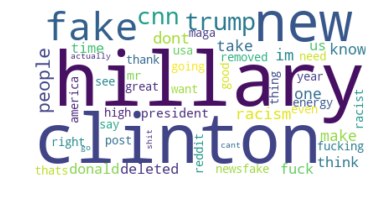

In [32]:
# Word Cloud for all tokenized comments in top 100 submissions with bigrams removed.
fullcloud = open("all_text_no_stops.txt", encoding="ANSI").read()
wordcloud = WordCloud(background_color="white", max_words = 50, collocations = False).generate(fullcloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
quarantine_text = open("master_comments_quarantine.txt", encoding="ANSI").read()

In [12]:
# Punctuation Removal & Casefolding
for char in punctuation:
    quarantine_text = quarantine_text.replace(char, "")
quarantine_text = quarantine_text.casefold()

In [13]:
# Tokenization & Stopwords
tokens = word_tokenize(quarantine_text)

stop = stopwords.words("english")

quarantine_no_stops = [word for word in tokens if word not in stopwords.words('english')]
    

In [14]:
# Saving no stops, no punctuation, tokenized list to a txt file
MyFile=open('quarantine_no_stops.txt', 'w', encoding="utf-8")

for element in quarantine_no_stops:
     MyFile.write(element)
     MyFile.write('\n')
MyFile.close()

In [15]:
# Frequency counter for total words in list.
freq = Counter(quarantine_no_stops)
freq.most_common(15)

[('people', 2534),
 ('like', 2491),
 ('trump', 1833),
 ('reddit', 1816),
 ('get', 1814),
 ('dont', 1598),
 ('us', 1593),
 ('one', 1569),
 ('would', 1343),
 ('im', 1271),
 ('sub', 1242),
 ('even', 1217),
 ('think', 1168),
 ('know', 1145),
 ('see', 1089)]

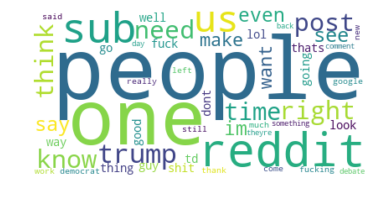

In [16]:
# Word Cloud of all tokenized comments in the top 250 threads t+12 hours after the quarantine.
quarantinecloud = open("quarantine_no_stops.txt", encoding="ANSI").read()
wordcloud = WordCloud(background_color="white", max_words = 50).generate(quarantinecloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# Summed activity for current top thread on r/all, a very small control

redditor_all = []

# Finds authors of all comments in a submission and adds them to a list
for submission in reddit.subreddit("all").hot(limit=1):
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        redditor_all.append(comment.author)

# Remove Duplicate Redditors from list
redditor_all = list(dict.fromkeys(redditor_all))

# Sums a Redditor's full history of comments/submissions by the subreddit they posted to
# PSAW Activity Function accepts lists as object, no loop needed to aggregate Redditors
redditor_activity_all = api.redditor_subreddit_activity(redditor_all)

print(redditor_activity_all)

{'comment': Counter({'AskReddit': 123961, 'nba': 57363, 'politics': 34407, 'DWMA': 30333, 'BlackPeopleTwitter': 29532, 'funny': 25574, 'pics': 23245, 'SquaredCircle': 22999, 'news': 19105, 'worldnews': 17104, 'todayilearned': 16284, 'videos': 15142, 'gaming': 14390, 'nfl': 11916, 'hiphopheads': 10988, 'MMA': 10847, 'WTF': 10775, 'AdviceAnimals': 9990, 'movies': 9979, 'CFB': 9586, 'leagueoflegends': 9193, 'gifs': 8789, 'teenagers': 8392, 'PS4': 7875, 'xboxone': 7156, 'Showerthoughts': 6465, 'dankmemes': 6421, 'popheads': 6294, 'aww': 5949, 'trashy': 5925, 'Music': 5852, 'mildlyinteresting': 5340, 'ireland': 4974, 'fffffffuuuuuuuuuuuu': 4921, 'hockey': 4563, 'television': 4456, 'wow': 4391, 'rupaulsdragrace': 4344, 'unpopularopinion': 4266, '2007scape': 4083, 'memes': 4069, 'AirForce': 4013, 'Kappa': 3908, 'trees': 3860, 'pcmasterrace': 3846, 'FortNiteBR': 3841, 'baseball': 3800, 'soccer': 3770, 'eagles': 3757, 'AmItheAsshole': 3706, 'technology': 3516, 'Games': 3423, 'WhitePeopleTwitter

In [81]:
# Converting nested dictionary into two lists
keys = list(redditor_activity_all["comment"].keys())
values = list(redditor_activity_all["comment"].values())

In [82]:
print(keys)

['AskReddit', 'nba', 'politics', 'DWMA', 'BlackPeopleTwitter', 'funny', 'pics', 'SquaredCircle', 'news', 'worldnews', 'todayilearned', 'videos', 'gaming', 'nfl', 'hiphopheads', 'MMA', 'WTF', 'AdviceAnimals', 'movies', 'CFB', 'leagueoflegends', 'gifs', 'teenagers', 'PS4', 'xboxone', 'Showerthoughts', 'dankmemes', 'popheads', 'aww', 'trashy', 'Music', 'mildlyinteresting', 'ireland', 'fffffffuuuuuuuuuuuu', 'hockey', 'television', 'wow', 'rupaulsdragrace', 'unpopularopinion', '2007scape', 'memes', 'AirForce', 'Kappa', 'trees', 'pcmasterrace', 'FortNiteBR', 'baseball', 'soccer', 'eagles', 'AmItheAsshole', 'technology', 'Games', 'WhitePeopleTwitter', 'IAmA', 'LAClippers', 'interestingasfuck', 'PublicFreakout', 'hearthstone', 'nottheonion', 'freefolk', 'atheism', 'MtvChallenge', 'electronic_cigarette', 'AskMen', 'PoliticalHumor', 'NBA2k', 'ReDWMA', 'OldSchoolCool', 'marvelstudios', 'relationships', 'FORTnITE', 'pokemon', 'LegendofKorraRP', 'buildapc', 'insanepeoplefacebook', 'ksrp', 'Android'

In [93]:
# Pops element, appending a space, until loop reaches 10th element for clean graph
for element in keys:
    keys.pop(10)
    keys.append(" ")

In [94]:
print(keys)

['AskReddit', 'nba', 'politics', 'DWMA', 'BlackPeopleTwitter', 'funny', 'pics', 'SquaredCircle', 'news', 'worldnews', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


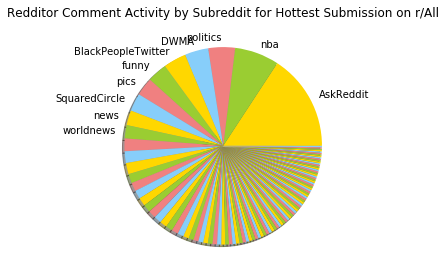

In [95]:
sizes = values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels = keys, colors = colors, shadow = True)
plt.title("Redditor Comment Activity by Subreddit for Hottest Submission on r/All")
plt.tight_layout()

In [ ]:
# Summed Redditor Activity for all Redditors who posted to the #3 thread of all time on "The_Donald" : 
    # "The New Algorithm Was Designed To Keep President Trump From The Front Page... But Sadly, That Won't Happen" 12/6/2016

top_sub_3 = reddit.submission(id = "5gvy1j")

redditor_activity_top = []
redditor_top = []

top_sub_3.comments.replace_more(limit=None)
for comment in top_sub_3.comments.list():
        redditor_top.append(comment.author)

redditor_activity_top = api.redditor_subreddit_activity(redditor_top)

print(redditor_activity_top)

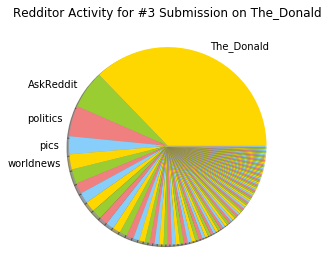

In [108]:
# Converting nested dictionary into two lists
keys10 = list(redditor_activity_top["comment"].keys())
values10 = list(redditor_activity_top["comment"].values())

# Pops the last element appending a space until loop reaches 10th element, for clean graph
for element in keys10:
    keys10.pop(5)
    keys10.append(" ")

sizes = values10
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels = keys10, colors = colors, shadow = True)
plt.title("Redditor Activity for #3 Submission on The_Donald")
plt.tight_layout()

In [ ]:
# Summed Redditor Activity for all Redditors who posted to the current top 3 "Hot" submissions in r/The_Donald 
from psaw import PushshiftAPI

api = PushshiftAPI()
redditor_activity = []
redditors = []

# Creates list of all Redditors who have submitted a comment in the top 3 submissions
for submission in subreddit.hot(limit=3):
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        redditors.append(comment.author)
        
# Remove duplicate Redditors from list
redditors = list(dict.fromkeys(redditors))

# PSAW activity function can aggregate lists as argument, no loop needed!
redditor_activity = api.redditor_subreddit_activity(redditors)

print(redditor_activity)

In [83]:
# Converting nested dictionary into two lists
keys2 = list(redditor_activity["comment"].keys())
values2 = list(redditor_activity["comment"].values())

# Pops element appending a space until loop reaches 5th element, for clean graph
for element in keys2:
    keys2.pop(3)
    keys2.append(" ")

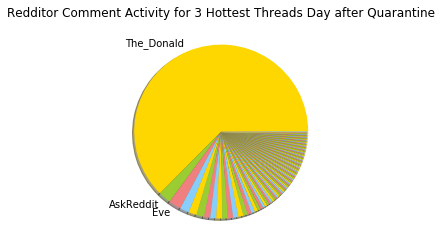

In [121]:
sizes = values2
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels = keys2, colors = colors, shadow = True)
plt.title("Redditor Comment Activity for 3 Hottest Threads Day after Quarantine")
plt.show()

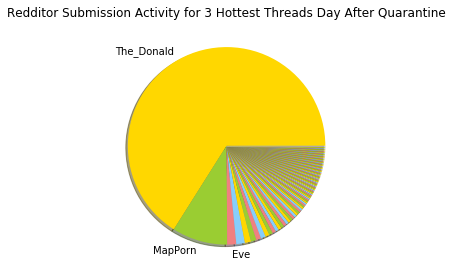

In [122]:
# Converting nested dictionary into two lists
keys_submissions2 = list(redditor_activity["submission"].keys())
values_submissions2 = list(redditor_activity["submission"].values())

# Pops element appending a space until loop reaches 10th element, for clean graph
for element in keys_submissions2:
    keys_submissions2.pop(3)
    keys_submissions2.append(" ")

sizes = values_submissions2
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels = keys_submissions2, colors = colors, shadow = True)
plt.title("Redditor Submission Activity for 3 Hottest Threads Day After Quarantine")
plt.tight_layout()

All this tells me is that a submissions are a less representative sample of redditor activity

Findings, Conclusions & Future Research

The data suggests a strong inverse relationship between the The_Donald's raw popularity (determined only by total_upvotes) and the upvote ratio of the submissions posted. It also seems to suggest that The_Donald, which was already very insular, has only become more insular over time. Both of these relationships make sense in the context of numerous front page modifications in 2016-2017 directed towards the_Donald and the recent quarantine actions. 

I think in the future it would be interesting to more closely examine how each of these changes by site administrators affected the data of The_Donald. The PSAW activity aggregator is a valuable but slow tool, and it would be interesting to extend it further.